In [109]:
import pandas as pd
df = pd.read_csv("antennes.csv")

In [110]:
print(df.shape)

(2170, 11)


In [111]:
df.columns

Index(['code_site', 'adresse', 'operateur', 'mise_en_serv', 'mise_en_serv_4g',
       'mise_en_serv_5g_3500', 'mise_en_serv_5g_700', 'type', 'ardt',
       'geo_shape', 'geo_point_2d'],
      dtype='object')

### Checking for Duplicate Rows

In [112]:
df.duplicated().sum()

np.int64(0)

In [113]:
df.duplicated(subset=["code_site"]).sum()

np.int64(0)

### Standardizing Operator Names

In [114]:
df["operateur"].unique()

array(['FREE MOBILE', 'BOUYGUES', 'ORANGE', 'SFR', 'Free Mobile'],
      dtype=object)

In [115]:
df['operateur'] = df['operateur'].str.upper()
df["operateur"].unique()

array(['FREE MOBILE', 'BOUYGUES', 'ORANGE', 'SFR'], dtype=object)

### Checking for Missing Values

In [116]:
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage.round(2)
})

print(missing_data)

                      Missing Count  Missing Percentage (%)
code_site                         0                    0.00
adresse                           0                    0.00
operateur                         0                    0.00
mise_en_serv                    121                    5.58
mise_en_serv_4g                1106                   50.97
mise_en_serv_5g_3500           1382                   63.69
mise_en_serv_5g_700            2170                  100.00
type                            587                   27.05
ardt                              0                    0.00
geo_shape                         0                    0.00
geo_point_2d                      0                    0.00


### Dropping the column with all missing values

In [117]:
df = df.drop('mise_en_serv_5g_700', axis=1)

### Converting columns to Datetime

In [118]:
date_cols = [
    "mise_en_serv",
    "mise_en_serv_4g",
    "mise_en_serv_5g_3500",
]

df[date_cols].dtypes


mise_en_serv            object
mise_en_serv_4g         object
mise_en_serv_5g_3500    object
dtype: object

In [119]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce") # NaT

In [120]:
df[date_cols].dtypes

mise_en_serv            datetime64[ns]
mise_en_serv_4g         datetime64[ns]
mise_en_serv_5g_3500    datetime64[ns]
dtype: object

### Identifying incoherent dates

In [121]:
df[
    (df["mise_en_serv_5g_3500"] < df["mise_en_serv_4g"]) |
    (df["mise_en_serv_4g"] < df["mise_en_serv"])
    ]


,code_site,adresse,operateur,mise_en_serv,mise_en_serv_4g,mise_en_serv_5g_3500,type,ardt,geo_shape,geo_point_2d
21,00000045U7,143 Avenue de versailles,ORANGE,2016-02-08,2014-05-16,2023-01-30,3G/4G/5G,75016,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.267748000403163, 'lat': 48.841983000..."
33,75112_024_08,20-22 Rue beccaria,FREE MOBILE,2018-04-25,2018-04-24,2023-03-15,3G/4G/5G,75012,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3788529998140913, 'lat': 48.84810300..."
34,00018367U8,21 Rue de la banque,ORANGE,2012-12-03,2012-09-17,2020-01-14,3G/4G/5G,75002,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3410799997781484, 'lat': 48.86836199..."
65,75109_033_01,5 Cité fénelon,FREE MOBILE,2021-03-31,2021-03-29,NaT,3G/4G/5G,75009,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3421554998641865, 'lat': 48.87882000..."
67,00080170U8,5 Rue de simplon,ORANGE,2014-01-09,2013-11-04,2023-01-26,3G/4G/5G,75018,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3518934996807617, 'lat': 48.89332800..."
...,...,...,...,...,...,...,...,...,...,...
2087,75116_108_01,30 Rue félicien david,FREE MOBILE,2019-06-12,2019-05-13,2023-02-22,3G/4G/5G,75016,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.2735349993447707, 'lat': 48.84885000..."
2128,75102_006_01,10 Rue bachaumont,FREE MOBILE,2016-11-30,2016-11-25,2024-11-21,3G/4G/5G,75002,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3458545003224374, 'lat': 48.86607600..."
2144,75112_004_03,15 Rue rottembourg,FREE MOBILE,2013-11-30,2013-09-27,2022-03-08,3G/4G/5G,75012,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.4056802658225496, 'lat': 48.83825910..."
2150,75116_091_02,16 Rue leconte de lisle,FREE MOBILE,2018-08-21,2018-08-20,NaT,3G/4G/5G,75016,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.268200722405712, 'lat': 48.848582159..."


In [122]:
anomalies = (
        (df["mise_en_serv_5g_3500"] < df["mise_en_serv_4g"]) |
        (df["mise_en_serv_4g"] < df["mise_en_serv"])
)
pourcentage_anomalies = anomalies.mean() * 100
print(f"{pourcentage_anomalies:.2f}% des lignes ont des anomalies de dates")

5.35% des lignes ont des anomalies de dates


### Replace these incorrect dates with NaT 

In [123]:
df.loc[df['mise_en_serv_4g'] < df['mise_en_serv'], 'mise_en_serv_4g'] = pd.NaT
df.loc[df['mise_en_serv_5g_3500'] < df['mise_en_serv_4g'], 'mise_en_serv_5g_3500'] = pd.NaT

### Handling missing values in the type column

In [124]:
df["type"].unique()

array(['3G/4G/5G', nan, '2G/3G/4G/5G', '2G/3G/4G', '3G/4G', '2G/3G'],
      dtype=object)

In [125]:
import numpy as np

df["missing_type"] = np.where(df["type"].isna(), 1, 0)
df["missing_mise_en_serv"] = np.where(df["mise_en_serv"].isna(), 1, 0)
df["missing_mise_en_serv_4g"] = np.where(df["mise_en_serv_4g"].isna(), 1, 0)
df["missing_mise_en_serv_5g_3500"] = np.where(df["mise_en_serv_5g_3500"].isna(), 1, 0)

columns_of_interest = [
    "missing_type",
    "missing_mise_en_serv",
    "missing_mise_en_serv_4g",
    "missing_mise_en_serv_5g_3500",
]


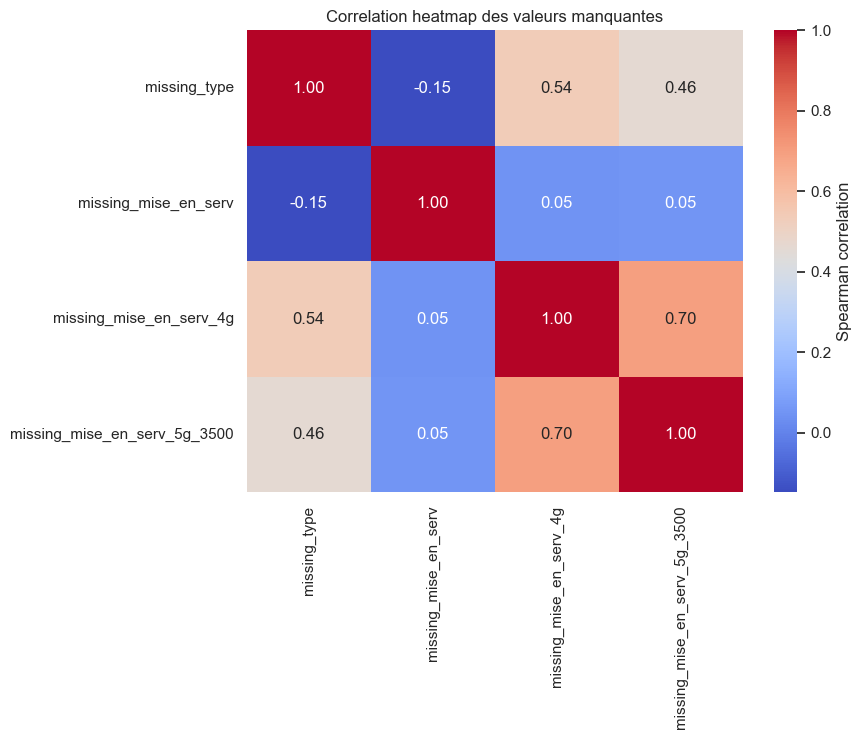

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[columns_of_interest].corr(method="spearman")

sns.set_theme(style="dark")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={"label": "Spearman correlation"}
)
heatmap.set_title("Correlation heatmap des valeurs manquantes")
plt.show()

### Analysis of missing value correlations

From this correlation heatmap, we can make several observations about missing values:

   - `missing_type` has a fairly strong correlation with `missing_mise_en_serv_4g` (0.60) and with `missing_mise_en_serv_5g_3500` (0.46).  
   - This confirms that when the `type` column is missing, the 4G and 5G deployment dates are often missing as well.

   - `missing_mise_en_serv_4g` and `missing_mise_en_serv_5g_3500` have a strong correlation of 0.77.  
   - This indicates that if the 4G deployment date is missing, the 5G deployment date is likely missing too.
      
=> We cannot infer `type` values from these columns

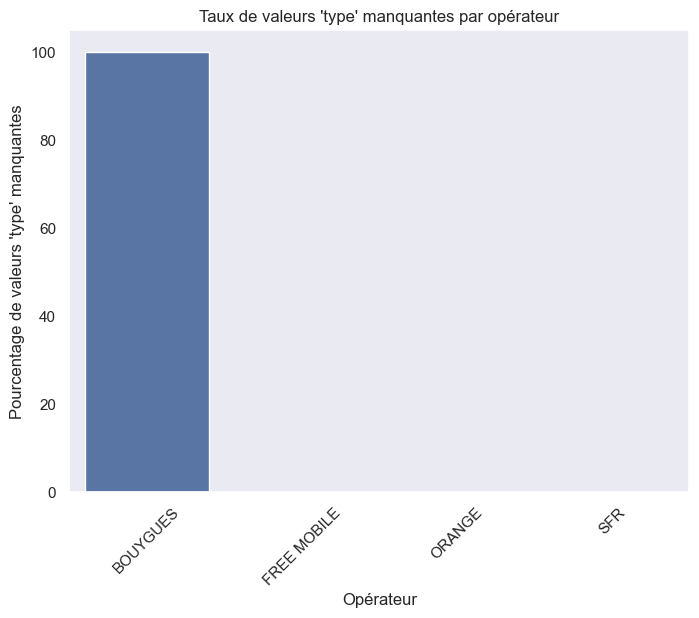

In [127]:
missing_counts = df[df["type"].isna()].groupby("operateur").size()
total_counts = df.groupby("operateur").size()

percent = (missing_counts / total_counts * 100).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=percent.index, y=percent.values)
plt.ylabel("Pourcentage de valeurs 'type' manquantes")
plt.xlabel("Opérateur")
plt.title("Taux de valeurs 'type' manquantes par opérateur")
plt.xticks(rotation=45)
plt.show()


=> MNAR missing not at random


### Imputation with constant value 

In [128]:
df["type_clean"] = df["type"].fillna("Unknown")


### Delete useless columns

In [129]:
df.columns


Index(['code_site', 'adresse', 'operateur', 'mise_en_serv', 'mise_en_serv_4g',
       'mise_en_serv_5g_3500', 'type', 'ardt', 'geo_shape', 'geo_point_2d',
       'missing_type', 'missing_mise_en_serv', 'missing_mise_en_serv_4g',
       'missing_mise_en_serv_5g_3500', 'type_clean'],
      dtype='object')

In [130]:
del_col = [
    'missing_type',
    'missing_mise_en_serv',
    'missing_mise_en_serv_4g',
    'missing_mise_en_serv_5g_3500',
    'type'

]

df = df.drop(columns=del_col)

In [131]:
df.columns

Index(['code_site', 'adresse', 'operateur', 'mise_en_serv', 'mise_en_serv_4g',
       'mise_en_serv_5g_3500', 'ardt', 'geo_shape', 'geo_point_2d',
       'type_clean'],
      dtype='object')

In [132]:
df["geo_point_2d"].dtypes


dtype('O')

### geo_shape and geo_point_2d 
These 2 columns contain the same information but in different formats i am going to keep the second to convert it simply to postgis format (wkt) 

In [133]:
import ast 

def extract_lat_lon(geo_str):
    geo_dict = ast.literal_eval(geo_str)  
    return pd.Series([geo_dict['lat'], geo_dict['lon']])

df[['lat','lon']] = df['geo_point_2d'].apply(extract_lat_lon)


In [134]:
df['geom'] = df.apply(lambda row: f"POINT({row['lon']} {row['lat']})", axis=1)


In [135]:
df

,code_site,adresse,operateur,mise_en_serv,mise_en_serv_4g,mise_en_serv_5g_3500,ardt,geo_shape,geo_point_2d,type_clean,lat,lon,geom
0,75116_113_01,5 bis Rue massenet,FREE MOBILE,2019-08-19,2019-08-23,NaT,75016,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.279549734702397, 'lat': 48.858338154...",3G/4G/5G,48.858338,2.279550,POINT(2.279549734702397 48.85833815460331)
1,75116_124_26,1 Impasse régnier,FREE MOBILE,2021-07-29,2021-07-29,2021-08-03,75016,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.284285500078927, 'lat': 48.856706999...",3G/4G/5G,48.856707,2.284286,POINT(2.284285500078927 48.85670699991089)
2,T15069,1 Rue verniquet,BOUYGUES,2004-02-19,NaT,NaT,75017,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3004657688056556, 'lat': 48.88683214...",Unknown,48.886832,2.300466,POINT(2.3004657688056556 48.88683214528272)
3,T15397,10 Avenue franklin delano roosevelt,BOUYGUES,2019-12-11,NaT,NaT,75008,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3102325004317232, 'lat': 48.87076499...",Unknown,48.870765,2.310233,POINT(2.3102325004317232 48.87076499982679)
4,75105_010_01,10 Rue jussieu,FREE MOBILE,2012-07-05,2013-11-06,2024-07-09,75005,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3563800001546404, 'lat': 48.84544799...",3G/4G/5G,48.845448,2.356380,POINT(2.3563800001546404 48.845447999676004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,753582,22 Rue beaunier,SFR,2021-05-28,NaT,NaT,75014,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3298327229024007, 'lat': 48.82428213...",2G/3G/4G/5G,48.824282,2.329833,POINT(2.3298327229024007 48.82428213511291)
2166,T10526,22 Rue monsieur le prince,BOUYGUES,2003-05-23,NaT,NaT,75006,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3399685001185087, 'lat': 48.84979500...",Unknown,48.849795,2.339969,POINT(2.3399685001185087 48.84979500006701)
2167,T10597,23 B boulevard bourdon,BOUYGUES,1996-06-25,NaT,NaT,75004,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3666850005391415, 'lat': 48.85003800...",Unknown,48.850038,2.366685,POINT(2.3666850005391415 48.85003800009883)
2168,75118_021_03,258 Rue marcadet,FREE MOBILE,2014-01-07,2014-01-07,2022-04-29,75018,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3290695002116224, 'lat': 48.89279700...",3G/4G/5G,48.892797,2.329070,POINT(2.3290695002116224 48.89279700043506)


In [136]:
df = df.drop(columns=['geo_point_2d', 'geo_shape','lat','lon'])


### Extract arrondissement value from the ardt column

In [137]:
df["ardt"].dtypes

dtype('int64')

In [138]:
df['ardt'].unique()

array([75016, 75017, 75008, 75005, 75015, 75009, 75004, 75019, 75020,
       75002, 75012, 75006, 75018, 75011, 75007, 75013, 75014, 75001,
       75010, 75003, 75116, 75111, 75112, 75113, 75118, 75110, 75117,
       75120, 75109, 75106, 75103, 75101, 75114, 76007, 75102])

In [139]:
df['ardt'].astype(str).str.startswith('76').sum()


np.int64(1)

=> an aberrant value 

In [140]:
df[df['ardt'].astype(str).str.startswith('76')]

,code_site,adresse,operateur,mise_en_serv,mise_en_serv_4g,mise_en_serv_5g_3500,ardt,type_clean,geom
1614,75107_044_04,30 Avenue bosquet,FREE MOBILE,2023-03-28,2023-03-28,2023-04-13,76007,3G/4G/5G,POINT(2.3037212434655454 48.85833802270796)


In [141]:
df = df[df['ardt'].astype(str).str.startswith('75')].copy()

In [142]:
df['arrondissement'] = df['ardt'].astype(str).str[-2:].astype(int)
df = df.drop(columns=['ardt'])
df

,code_site,adresse,operateur,mise_en_serv,mise_en_serv_4g,mise_en_serv_5g_3500,type_clean,geom,arrondissement
0,75116_113_01,5 bis Rue massenet,FREE MOBILE,2019-08-19,2019-08-23,NaT,3G/4G/5G,POINT(2.279549734702397 48.85833815460331),16
1,75116_124_26,1 Impasse régnier,FREE MOBILE,2021-07-29,2021-07-29,2021-08-03,3G/4G/5G,POINT(2.284285500078927 48.85670699991089),16
2,T15069,1 Rue verniquet,BOUYGUES,2004-02-19,NaT,NaT,Unknown,POINT(2.3004657688056556 48.88683214528272),17
3,T15397,10 Avenue franklin delano roosevelt,BOUYGUES,2019-12-11,NaT,NaT,Unknown,POINT(2.3102325004317232 48.87076499982679),8
4,75105_010_01,10 Rue jussieu,FREE MOBILE,2012-07-05,2013-11-06,2024-07-09,3G/4G/5G,POINT(2.3563800001546404 48.845447999676004),5
...,...,...,...,...,...,...,...,...,...
2165,753582,22 Rue beaunier,SFR,2021-05-28,NaT,NaT,2G/3G/4G/5G,POINT(2.3298327229024007 48.82428213511291),14
2166,T10526,22 Rue monsieur le prince,BOUYGUES,2003-05-23,NaT,NaT,Unknown,POINT(2.3399685001185087 48.84979500006701),6
2167,T10597,23 B boulevard bourdon,BOUYGUES,1996-06-25,NaT,NaT,Unknown,POINT(2.3666850005391415 48.85003800009883),4
2168,75118_021_03,258 Rue marcadet,FREE MOBILE,2014-01-07,2014-01-07,2022-04-29,3G/4G/5G,POINT(2.3290695002116224 48.89279700043506),18


In [143]:
df.to_csv("antennes_clean.csv", index=False)

### Load cleaned data to postgres + postgis

In [144]:
from db_utils import load_to_db
load_to_db(df)